<a href="https://colab.research.google.com/github/Mohammed20f20375/AI-CODE-FOR-ASSIGNMENT/blob/main/Copy_of_dogs_cats_classification_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
#My dataset is available in googledrive; so I am accessing my drive from colab
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
#Once this is executed, you will see your drive appearing on the left hand side

Mounted at /content/drive


In [9]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [21]:
# Define paths to the dataset
train_dir = '/content/drive/MyDrive/x-ray classification/Train'  # Update with your actual path
test_dir = '/content/drive/MyDrive/x-ray classification/Test'   # Update with your actual path

In [22]:
import os
print(len(os.listdir('/content/drive/MyDrive/x-ray classification/Test/non x-ray')))
print(len(os.listdir('/content/drive/MyDrive/x-ray classification/Test/x-ray')))
print(len(os.listdir('/content/drive/MyDrive/x-ray classification/Train/non x-ray')))
print(len(os.listdir('/content/drive/MyDrive/x-ray classification/Train/x-ray')))


551
565
621
565


In [27]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Create ImageDataGenerator for training set
train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2  # Split 20% of the images for validation
)

# Load and prepare training data
train_data = train_datagen.flow_from_directory(
    train_dir,
    target_size=(256,256),
    batch_size=32,
    class_mode='binary',  # 'binary' for binary classification (cats vs. dogs)
    subset='training' , # Specify 'training' for the training set
    classes=['non x-ray', 'x-ray']
)

# Create ImageDataGenerator for validation set
validation_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2  # Note: Using the same validation split as in the training set
)

# Load and prepare validation data
validation_data = validation_datagen.flow_from_directory(
    train_dir,
    target_size=(256,256),
    batch_size=32,
    class_mode='binary',
    subset='validation',  # Specify 'validation' for the validation set
    classes=['non x-ray', 'x-ray']
)

Found 949 images belonging to 2 classes.
Found 236 images belonging to 2 classes.


In [28]:
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,UpSampling2D, Dropout

In [29]:
# create CNN model

model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))  # 32 filters
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu')) #feature reduction
model.add(Dense(64,activation='relu'))
model.add(Dense(1,activation='sigmoid'))  #output layer

In [30]:
from keras.optimizers import Adam
model.compile(optimizer=Adam(learning_rate=0.001),loss='binary_crossentropy',metrics=['accuracy']) #binary_crossentropy - binary classification

In [31]:
history = model.fit(train_data, epochs=20, validation_data=validation_data)

Epoch 1/20
30/30 [==============================] - 106s 4s/step - loss: 0.3517 - accuracy: 0.8588 - val_loss: 0.1354 - val_accuracy: 0.9237
Epoch 2/20
30/30 [==============================] - 102s 3s/step - loss: 0.0189 - accuracy: 0.9926 - val_loss: 0.0509 - val_accuracy: 0.9915
Epoch 3/20
30/30 [==============================] - 102s 3s/step - loss: 0.0018 - accuracy: 1.0000 - val_loss: 0.0794 - val_accuracy: 0.9831
Epoch 4/20
30/30 [==============================] - 102s 3s/step - loss: 6.0716e-04 - accuracy: 1.0000 - val_loss: 0.0827 - val_accuracy: 0.9873
Epoch 5/20
30/30 [==============================] - 101s 3s/step - loss: 0.0039 - accuracy: 0.9989 - val_loss: 0.0832 - val_accuracy: 0.9831
Epoch 6/20
30/30 [==============================] - 101s 3s/step - loss: 0.0045 - accuracy: 0.9979 - val_loss: 0.0869 - val_accuracy: 0.9746
Epoch 7/20
30/30 [==============================] - 102s 3s/step - loss: 0.0320 - accuracy: 0.9958 - val_loss: 0.0927 - val_accuracy: 0.9703
Epoch 8/2

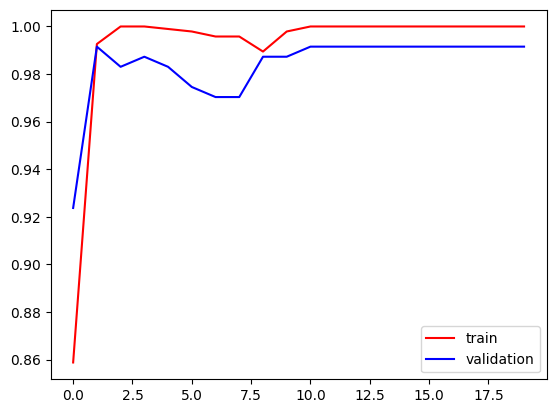

In [32]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

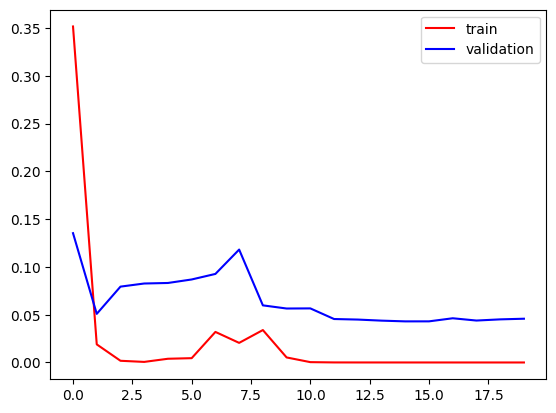

In [33]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [35]:
test_datagen = ImageDataGenerator(rescale=1./255)
test_data = test_datagen.flow_from_directory(
    test_dir,
    target_size=(256,256),
    batch_size=32,
    class_mode='binary',
    classes=['non x-ray', 'x-ray']
)

Found 1115 images belonging to 2 classes.


In [36]:
#predict the test data
predictions = model.predict(test_data)


35/35 [==============================] - 30s 859ms/step


In [37]:
from sklearn.metrics import confusion_matrix, classification_report

# Assuming you have ground truth labels (true_labels) and predicted labels (predictions)
true_labels = test_data.classes
predicted_labels = (predictions > 0.5).astype(int)  # Adjust the threshold as needed

# Calculate confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

# Print confusion matrix
print("Confusion Matrix:")
print(cm)

# Print classification report
print("Classification Report:")
print(classification_report(true_labels, predicted_labels))

Confusion Matrix:
[[267 284]
 [282 282]]
Classification Report:
              precision    recall  f1-score   support

           0       0.49      0.48      0.49       551
           1       0.50      0.50      0.50       564

    accuracy                           0.49      1115
   macro avg       0.49      0.49      0.49      1115
weighted avg       0.49      0.49      0.49      1115



There is overfitting and hence applying Batchnormalisation and Dropout techniques to handle overfitting

In [38]:
# create CNN model

model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))  # 32 filters
model.add(BatchNormalization())  # added to reduce overfitting
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())  # added to reduce overfitting
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())  # added to reduce overfitting
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu')) #feature reduction
model.add(Dropout(0.1))  # added to reduce overfitting
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))  # added to reduce overfitting
model.add(Dense(1,activation='sigmoid'))  #output layer

In [39]:
from keras.optimizers import Adam
model.compile(optimizer=Adam(learning_rate=0.001),loss='binary_crossentropy',metrics=['accuracy'])

In [40]:
history = model.fit(train_data, epochs=20, validation_data=validation_data)

Epoch 1/20
30/30 [==============================] - 152s 5s/step - loss: 0.7828 - accuracy: 0.9505 - val_loss: 8.4247 - val_accuracy: 0.5254
Epoch 2/20
30/30 [==============================] - 149s 5s/step - loss: 0.0846 - accuracy: 0.9916 - val_loss: 15.5166 - val_accuracy: 0.5212
Epoch 3/20
30/30 [==============================] - 150s 5s/step - loss: 0.1500 - accuracy: 0.9916 - val_loss: 25.9130 - val_accuracy: 0.5254
Epoch 4/20
30/30 [==============================] - 149s 5s/step - loss: 1.0056 - accuracy: 0.9800 - val_loss: 9.8877 - val_accuracy: 0.8220
Epoch 5/20
30/30 [==============================] - 149s 5s/step - loss: 0.6788 - accuracy: 0.9863 - val_loss: 10.6770 - val_accuracy: 0.8093
Epoch 6/20
30/30 [==============================] - 148s 5s/step - loss: 0.2202 - accuracy: 0.9905 - val_loss: 2.3785 - val_accuracy: 0.9322
Epoch 7/20
30/30 [==============================] - 149s 5s/step - loss: 0.1313 - accuracy: 0.9979 - val_loss: 3.3821 - val_accuracy: 0.9110
Epoch 8/20

In [42]:
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          test_datagen = ImageDataGenerator(rescale=1./255)
test_data = test_datagen.flow_from_directory(
    test_dir,
    target_size=(256,256),
    batch_size=32,
    class_mode='binary',
    classes=['non x-ray', 'x-ray']
)

Found 1115 images belonging to 2 classes.


In [43]:
predictions = model.predict(test_data)

35/35 [==============================] - 45s 1s/step


In [44]:
from sklearn.metrics import confusion_matrix, classification_report

# Assuming you have ground truth labels (true_labels) and predicted labels (predictions)
true_labels = test_data.classes
predicted_labels = (predictions > 0.5).astype(int)  # Adjust the threshold as needed

# Calculate confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

# Print confusion matrix
print("Confusion Matrix:")
print(cm)

# Print classification report
print("Classification Report after applying techniques to handle overfitting:")
print(classification_report(true_labels, predicted_labels))

Confusion Matrix:
[[507  44]
 [522  42]]
Classification Report after applying techniques to handle overfitting:
              precision    recall  f1-score   support

           0       0.49      0.92      0.64       551
           1       0.49      0.07      0.13       564

    accuracy                           0.49      1115
   macro avg       0.49      0.50      0.39      1115
weighted avg       0.49      0.49      0.38      1115



Using Pre-trained model - Resnet

In [45]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten

resnet_model = Sequential()    #ResNet50 is a pre-trained model
pretrained_model = tf.keras.applications.ResNet50(include_top = False, #because i have my own image of a diff dimension
                                                input_shape = (256,256,3),
                                                pooling = 'max', classes = 2,
                                                weights = 'imagenet')
for layer in pretrained_model.layers:
    layer.trainable = False  #all layers in the Resnet50 is not trainable; keep those weights; I am going to add my own i/p and other layers

resnet_model.add(pretrained_model)
resnet_model.add(Flatten())
resnet_model.add(Dense(512, activation = 'relu'))
resnet_model.add(Dense(1, activation = 'sigmoid'))

94765736/94765736 [==============================] - 0s 0us/step


In [46]:
from keras.optimizers import Adam
resnet_model.compile(optimizer=Adam(learning_rate=0.001),loss='binary_crossentropy',metrics=['accuracy'])

In [47]:
history = resnet_model.fit(train_data, epochs=20, validation_data=validation_data)

Epoch 1/20
30/30 [==============================] - 286s 9s/step - loss: 1.7666 - accuracy: 0.5501 - val_loss: 1.2781 - val_accuracy: 0.5297
Epoch 2/20
30/30 [==============================] - 279s 9s/step - loss: 0.5979 - accuracy: 0.7134 - val_loss: 0.5081 - val_accuracy: 0.7119
Epoch 3/20
30/30 [==============================] - 277s 9s/step - loss: 0.2955 - accuracy: 0.8830 - val_loss: 0.5822 - val_accuracy: 0.7161
Epoch 4/20
30/30 [==============================] - 278s 9s/step - loss: 0.2623 - accuracy: 0.9031 - val_loss: 0.3889 - val_accuracy: 0.8559
Epoch 5/20
30/30 [==============================] - 277s 9s/step - loss: 0.2306 - accuracy: 0.9210 - val_loss: 0.4170 - val_accuracy: 0.8136
Epoch 6/20
30/30 [==============================] - 280s 9s/step - loss: 0.2094 - accuracy: 0.9378 - val_loss: 0.3040 - val_accuracy: 0.8686
Epoch 7/20
30/30 [==============================] - 276s 9s/step - loss: 0.1825 - accuracy: 0.9378 - val_loss: 0.3169 - val_accuracy: 0.8644
Epoch 8/20
30

In [48]:
predictions = resnet_model.predict(test_data)

35/35 [==============================] - 260s 7s/step


In [49]:
from sklearn.metrics import confusion_matrix, classification_report

# Assuming you have ground truth labels (true_labels) and predicted labels (predictions)
true_labels = test_data.classes
predicted_labels = (predictions > 0.5).astype(int)  # Adjust the threshold as needed

# Calculate confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

# Print confusion matrix
print("Confusion Matrix:")
print(cm)

# Print classification report
print("Classification Report after applying techniques to handle overfitting:")
print(classification_report(true_labels, predicted_labels))

Confusion Matrix:
[[249 302]
 [285 279]]
Classification Report after applying techniques to handle overfitting:
              precision    recall  f1-score   support

           0       0.47      0.45      0.46       551
           1       0.48      0.49      0.49       564

    accuracy                           0.47      1115
   macro avg       0.47      0.47      0.47      1115
weighted avg       0.47      0.47      0.47      1115

